In [1]:
import numpy as np
import pandas as pd
import os



In [2]:
base_dir='E:/python/work/malaria-dataset-processed/cell_images'

In [3]:
mal_train_dir="E:/python/work/malaria-dataset-processed/cell_images/train/Parasitized"
normal_train_dir="E:/python/work/malaria-dataset-processed/cell_images/train/Uninfected"


mal_val_dir="E:/python/work/malaria-dataset-processed/cell_images/valid/Parasitized"
normal_val_dir="E:/python/work/malaria-dataset-processed/cell_images/valid/Uninfected"

mal_test_dir="E:/python/work/malaria-dataset-processed/cell_images/test/Parasitized"
normal_test_dir="E:/python/work/malaria-dataset-processed/cell_images/test/Uninfected"


In [4]:
print('total training cat images:', len(os.listdir(mal_train_dir))) 
print('total training dog images:', len(os.listdir(normal_train_dir))) 
print('total validation cat images:', len(os.listdir(mal_val_dir))) 
print('total validation dog images:', len(os.listdir(normal_val_dir)))
print('total test cat images:', len(os.listdir(mal_test_dir))) 
print('total test dog images:', len(os.listdir(normal_test_dir))) 

total training cat images: 11023
total training dog images: 11023
total validation cat images: 2756
total validation dog images: 2756
total test cat images: 816
total test dog images: 904


In [5]:
from tensorflow.keras import layers 
from tensorflow.keras import models
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


In [9]:
train_dir="E:/python/work/malaria-dataset-processed/cell_images/train"
validation_dir="E:/python/work/malaria-dataset-processed/cell_images/valid"

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory( 
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
validation_generator=test_datagen.flow_from_directory(  
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Using TensorFlow backend.


Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [11]:
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
history = model.fit_generator( train_generator, 
                              steps_per_epoch=100, epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 148s 1s/step - loss: 0.6953 - acc: 0.5095 - val_loss: 0.6834 - val_acc: 0.5940
Epoch 2/30
100/100 [==============================] - 129s 1s/step - loss: 0.6858 - acc: 0.5575 - val_loss: 0.6646 - val_acc: 0.5770
Epoch 3/30
100/100 [==============================] - 138s 1s/step - loss: 0.6668 - acc: 0.5935 - val_loss: 0.6351 - val_acc: 0.6850
Epoch 4/30
100/100 [==============================] - 142s 1s/step - loss: 0.6363 - acc: 0.6410 - val_loss: 0.5632 - val_acc: 0.7520
Epoch 5/30
100/100 [==============================] - 128s 1s/step - loss: 0.5707 - acc: 0.7070 - val_loss: 0.6339 - val_acc: 0.5940
Epoch 6/30
100/100 [==============================] - 119s 1s/step - loss: 0.5627 - acc: 0.7120 - val_loss: 0.4783 - val_acc: 0.7880
Epoch 7/30
100/100 [==============================] - 122s 1s/step - loss: 0.5322 - acc: 0.7330 - val_loss: 0.4592 - val_acc: 0.8160
Epoch 8/30
100/100 [==============================] - 121s 1s/step - 

In [13]:
import matplotlib.pyplot as plt
acc=history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [14]:
model.save('malaria_data.h1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: malaria_data.h1\assets


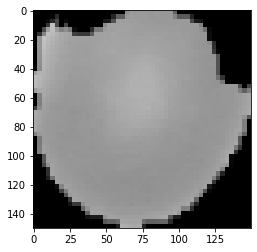

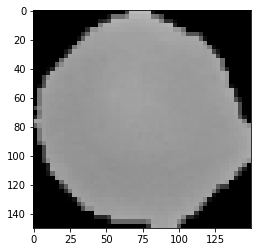

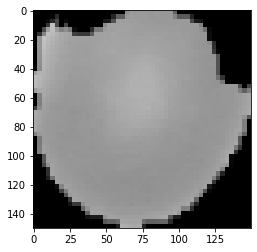

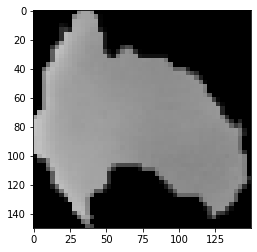

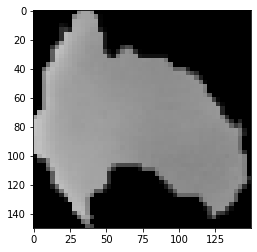

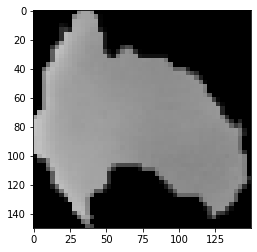

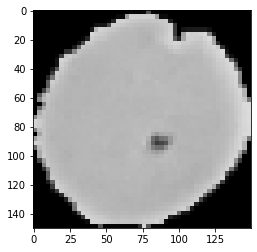

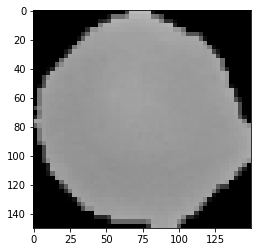

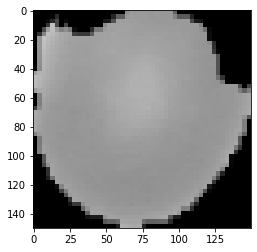

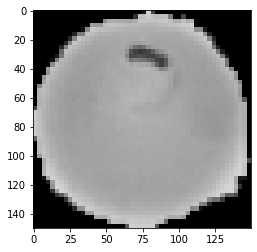

In [16]:
import math
from random import randint
predlist=[]

for i in range(10):
    
    img_path=f'E:/python/work/malaria-dataset-processed/cell_images/test1/{randint(1,15)}.png'
    from tensorflow.keras.preprocessing import image
    import numpy as np
    img=image.load_img(img_path,target_size=(150,150))
    img_tensor=image.img_to_array(img)
    img_tensor=np.expand_dims(img_tensor,axis=0)
    img_tensor/=255
    predlist.append(model.predict(img_tensor))
    import matplotlib.pyplot as plt
    plt.imshow(img_tensor[0])
    plt.show()

In [18]:
for pred in predlist:
    if pred>=.50:
        print('normal')
    else:
        print("mal")
predlist

normal
normal
normal
normal
normal
normal
mal
normal
normal
mal


[array([[0.94305784]], dtype=float32),
 array([[0.97906715]], dtype=float32),
 array([[0.94305784]], dtype=float32),
 array([[0.92970073]], dtype=float32),
 array([[0.92970073]], dtype=float32),
 array([[0.92970073]], dtype=float32),
 array([[0.00026085]], dtype=float32),
 array([[0.97906715]], dtype=float32),
 array([[0.94305784]], dtype=float32),
 array([[5.1224415e-06]], dtype=float32)]